In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
%cd "E:\MLAI classes\projects\project 4"
data=pd.read_csv("CC_GENERAL.csv")

E:\MLAI classes\projects\project 4


In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [8]:
data['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
#as mean value of credit_limit seems to close to median perfering mean over median
#as mean value of minimum_payments seem far form median perfering median in this case.
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
#1.monthly cash and avg purchase 
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']
data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']
data['Monthly_cash_advance'].head()
data['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [11]:
data['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [12]:
#2.purchase type 
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head()


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


In [13]:
def purchase_type(data):
    if((data.ONEOFF_PURCHASES==0)&(data.INSTALLMENTS_PURCHASES==0)):
        return 'none'
    if((data.ONEOFF_PURCHASES>0)&(data.INSTALLMENTS_PURCHASES>0)):
        return 'oneoff_installment'
    if((data.ONEOFF_PURCHASES==0)&(data.INSTALLMENTS_PURCHASES>0)):
        return 'installment'
    if((data.ONEOFF_PURCHASES>0)&(data.INSTALLMENTS_PURCHASES==0)):
        return 'oneoff'


In [14]:
data['purchase_type']=data.apply(purchase_type,axis=1)


In [15]:
data['purchase_type'].value_counts()


oneoff_installment    2774
installment           2260
none                  2042
oneoff                1874
Name: purchase_type, dtype: int64

In [16]:
#3.Limit_Usage (balance to credit limit ratio)
data['LIMIT_USAGE']=data['BALANCE']/data['CREDIT_LIMIT']
data.loc[:,['BALANCE','CREDIT_LIMIT','LIMIT_USAGE']].head()


,BALANCE,CREDIT_LIMIT,LIMIT_USAGE
0,40.900749,1000.0,0.040901
1,3202.467416,7000.0,0.457495
2,2495.148862,7500.0,0.332687
3,1666.670542,7500.0,0.222223
4,817.714335,1200.0,0.681429


In [17]:
#4.payment and minimim payment ratio
data['PAYMENT_MIN_PAY']=data['PAYMENTS']/data['MINIMUM_PAYMENTS']
data.loc[:,['PAYMENTS','MINIMUM_PAYMENTS','PAYMENT_MIN_PAY']].head()

,PAYMENTS,MINIMUM_PAYMENTS,PAYMENT_MIN_PAY
0,201.802084,139.509787,1.446508
1,4103.032597,1072.340217,3.826241
2,622.066742,627.284787,0.991682
3,0.000000,312.343947,0.000000
4,678.334763,244.791237,2.771075


In [18]:
#outlier treatment
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


# insights

In [19]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_cash_advance,Monthly_avg_purchase,purchase_type,LIMIT_USAGE,PAYMENT_MIN_PAY
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,0.000000,7.950000,installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,536.912124,0.000000,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,0.000000,64.430833,oneoff,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,17.149001,124.916667,oneoff,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,0.000000,1.333333,oneoff,0.681429,2.771075


In [20]:
# Average payment_minpayment ratio for each purchse type.
x=data.groupby('purchase_type').apply(lambda x: np.mean(x['PAYMENT_MIN_PAY']))
type(x)
x.values


array([13.2590037 , 10.08745106,  5.57108156,  7.23698216])

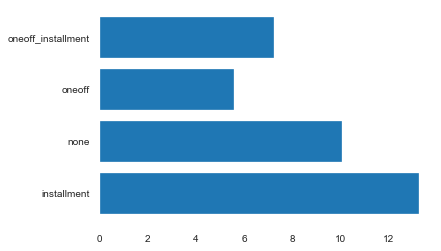

In [21]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)),width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);

installment purchases customer are paying dues. 

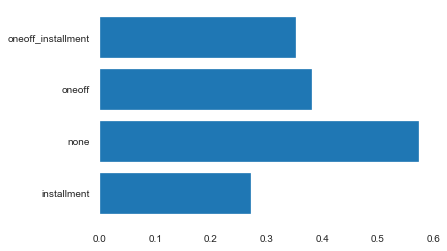

In [22]:
a=data.groupby('purchase_type').apply(lambda x: np.mean(x['LIMIT_USAGE']))
fig,ax=plt.subplots()
ax.barh(y=range(len(a)),width=a.values,align='center')
ax.set(yticks= np.arange(len(a)),yticklabels=a.index);

Customers take more cash on advance who don't do either one-off or installment purchases.

# machine learning

In [23]:
data1=pd.concat([data,pd.get_dummies(data['purchase_type'])],axis=1)
data1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_cash_advance,Monthly_avg_purchase,purchase_type,LIMIT_USAGE,PAYMENT_MIN_PAY,installment,none,oneoff,oneoff_installment
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,12,0.000000,7.950000,installment,0.040901,1.446508,1,0,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,12,536.912124,0.000000,none,0.457495,3.826241,0,1,0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,0.000000,64.430833,oneoff,0.332687,0.991682,0,0,1,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,12,17.149001,124.916667,oneoff,0.222223,0.000000,0,0,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,12,0.000000,1.333333,oneoff,0.681429,2.771075,0,0,1,0


In [24]:
data1=data1.drop(['CUST_ID','purchase_type'],axis=1,inplace=False)
data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_cash_advance,Monthly_avg_purchase,LIMIT_USAGE,PAYMENT_MIN_PAY,installment,none,oneoff,oneoff_installment
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,0.000000,7.950000,0.040901,1.446508,1,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,536.912124,0.000000,0.457495,3.826241,0,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,0.000000,64.430833,0.332687,0.991682,0,0,1,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,17.149001,124.916667,0.222223,0.000000,0,0,1,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,0.000000,1.333333,0.681429,2.771075,0,0,1,0


In [ ]:
pandas_profiling.ProfileReport(data1)

# puting data on the same scale

In [25]:
ss=StandardScaler()
datas=ss.fit_transform(data1)

In [26]:
datas.shape

(8950, 25)

In [27]:
#principle component analysis.
#loop to find out no. of component with information ratio outcome.
ratio={} #creating dicnary 
for n in range(1,26):
    pc=PCA(n_components=n)
    datas_pca=pc.fit(datas)
    ratio[n]=sum(datas_pca.explained_variance_ratio_)

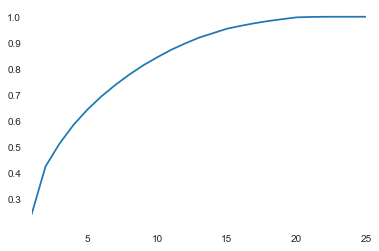

In [28]:
pd.Series(ratio).plot()

In [29]:
ratio

{1: 0.24238884988947673,
 2: 0.4263113171387016,
 3: 0.5133609042125755,
 4: 0.585288987354032,
 5: 0.6439754897593775,
 6: 0.694513433508368,
 7: 0.7384403685671189,
 8: 0.7781323300388004,
 9: 0.8136409939210931,
 10: 0.8444034526963086,
 11: 0.8731495338562054,
 12: 0.8974953552179052,
 13: 0.9197878908546467,
 14: 0.936917772101985,
 15: 0.9540329538883708,
 16: 0.9652941067105464,
 17: 0.9752453369597804,
 18: 0.9837603295613622,
 19: 0.9909031386186082,
 20: 0.9977216434830066,
 21: 0.9991752949576638,
 22: 0.9998240903061777,
 23: 0.9999995350691694,
 24: 0.9999999999999999,
 25: 0.9999999999999999}

91% variance came from 13 components

In [30]:
#fit in data form
data_pca=PCA(n_components=14).fit(datas)
data_final=data_pca.fit_transform(datas)

In [31]:
c_list=data1.columns
c_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_cash_advance', 'Monthly_avg_purchase', 'LIMIT_USAGE',
       'PAYMENT_MIN_PAY', 'installment', 'none', 'oneoff',
       'oneoff_installment'],
      dtype='object')

In [32]:
dd=pd.DataFrame(data_final)
dd.shape

(8950, 14)

In [33]:
pd.DataFrame(data_pca.components_.T, columns=['_' +str(i) for i in range(14)],index=c_list)

,_0,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
BALANCE,0.036090,0.350714,-0.093703,0.199697,0.086405,0.216278,0.145451,0.011301,0.201652,0.076785,-2.731755e-01,0.067745,-0.099771,0.335737
BALANCE_FREQUENCY,0.079361,0.139178,-0.155519,0.413914,-0.105012,-0.031622,-0.118120,-0.097166,-0.373592,0.453081,-2.857259e-01,-0.046681,0.153105,-0.486612
PURCHASES,0.354442,0.106109,0.157250,-0.064746,0.233433,-0.044940,-0.123359,-0.011371,-0.067490,-0.056901,-2.877017e-02,0.023369,-0.070924,-0.057846
ONEOFF_PURCHASES,0.298914,0.116954,0.279876,-0.060450,0.170954,-0.031013,-0.148815,-0.017409,-0.112133,-0.012706,-5.877479e-02,-0.217857,-0.395808,-0.055059
INSTALLMENTS_PURCHASES,0.288835,0.035946,-0.142356,-0.042128,0.237949,-0.049157,-0.018365,0.005062,0.046275,-0.111275,3.981745e-02,0.455462,0.559295,-0.035606
CASH_ADVANCE,-0.073616,0.377774,-0.144775,-0.247391,-0.147499,0.081088,0.025933,-0.013929,-0.020506,-0.049378,3.642485e-02,-0.277982,0.217193,-0.038111
PURCHASES_FREQUENCY,0.298316,-0.125981,-0.282268,0.047566,-0.258595,0.121315,-0.092936,0.054233,-0.024524,0.035007,-1.633466e-02,-0.080403,-0.076362,-0.005597
ONEOFF_PURCHASES_FREQUENCY,0.260511,0.043423,0.242371,0.129714,-0.385936,0.008677,-0.031329,0.045582,0.012182,0.140649,7.008900e-02,-0.045838,-0.112894,0.107293
PURCHASES_INSTALLMENTS_FREQUENCY,0.255040,-0.124271,-0.447033,0.008825,-0.069349,-0.002062,-0.025434,0.035660,0.003874,-0.084498,-2.971700e-02,-0.030594,-0.004541,-0.022397
CASH_ADVANCE_FREQUENCY,-0.122065,0.349189,-0.107772,-0.042974,-0.137915,-0.101906,-0.161028,0.027399,-0.152552,-0.045820,8.195125e-02,0.379267,-0.263663,0.013986


In [34]:
data_dt=pd.DataFrame(data_final)
data_dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.406678,-2.003236,-0.272608,-0.465209,0.865928,0.399575,0.069279,-0.204925,-0.462984,-0.732686,-0.239253,-0.305860,-0.384626,-0.600355
1,-2.173601,3.210174,-0.228001,-1.369458,0.341811,-0.464707,1.157113,-0.579888,0.039805,0.705617,-0.184839,-1.214431,1.006133,-0.025504
2,0.719983,-0.360314,2.089960,1.275065,-1.694094,1.823079,0.154246,0.120571,-0.052260,0.635950,-0.711981,0.116093,-0.097562,-0.057176
3,-0.777868,-0.330818,2.449533,-0.234201,0.201179,1.370873,0.406779,-0.053163,0.294511,-0.684453,-0.453934,0.603943,-0.202337,-0.024804
4,-1.658893,-0.829012,1.708955,1.236158,0.023767,1.052771,-0.462786,0.097448,-0.803157,-0.201719,0.002688,-0.155943,1.005254,-0.050083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.079256,-2.560050,-1.903336,-1.563345,-0.198566,-0.129158,-3.266129,0.403132,1.332839,1.611984,-1.118643,-0.218181,-0.125583,-0.525315
8946,-0.288504,-2.306678,-1.862787,-0.933770,-0.030646,-0.014336,-3.322791,0.697809,1.652287,0.467067,-1.539644,-0.333288,-0.218484,-1.238043
8947,-0.622741,-2.482991,-1.476106,-1.531849,-0.016774,-0.094673,-3.138467,0.558211,1.765313,0.763308,-1.141771,-0.258042,-0.337175,-0.501463
8948,-2.496904,-0.813818,0.805596,-1.202682,0.536088,-2.341409,-2.553838,0.304098,1.972862,1.383537,-0.551530,0.423799,0.066782,-0.713298


# Number of cluster need

In [35]:
cluster_range = range( 2, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data_final )
    cluster_errors.append( clusters.inertia_ )

In [36]:
clusters = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters[0:15]

,num_clusters,cluster_errors
0,2,176672.272565
1,3,154127.002388
2,4,139607.965978
3,5,124764.436522
4,6,112712.371570
5,7,104917.307259
6,8,97853.051375
7,9,94271.822902
8,10,89903.104952
9,11,84955.518189


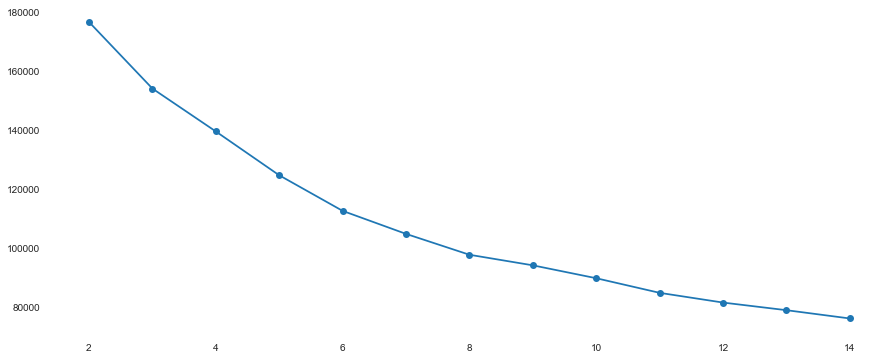

In [37]:
#visualising the number of cluster by L-bow technecq
plt.figure(figsize=(15,6))
plt.plot( clusters.num_clusters, clusters.cluster_errors, marker = "o" )

#some where around 4-9 could be the best.

# Clustering
<big>
trying to keep it simple I start with 6 clusters
</big>

In [38]:
KM_data=KMeans(n_clusters=6,random_state=32)
KM_data.fit(data_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=32, tol=0.0001, verbose=0)

In [39]:
pd.Series(KM_data.labels_).value_counts()

1    2403
4    2155
0    1834
5    1708
2     676
3     174
dtype: int64

In [40]:
KM_data.labels_

array([4, 2, 5, ..., 4, 0, 5])

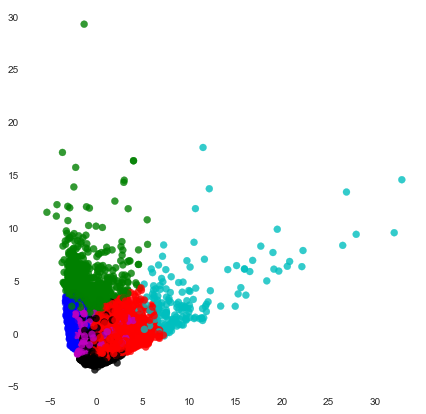

In [41]:
map_graph={0:'b',1:'r',2:'g',3:'c',4:'k',5:'m'}
data_color=[map_graph[l] for l in KM_data.labels_]
plt.figure(figsize=(7,7))
plt.scatter(data_final[:,0],data_final[:,1],c=data_color,cmap='Spectral',alpha=0.8)

In [42]:
all_plot=pd.DataFrame(data_final,columns=['_' +str(i) for i in range(14)])
all_plot['Cluster']=KM_data.labels_

In [43]:
KM_data.labels_

array([4, 2, 5, ..., 4, 0, 5])

In [44]:
all_plot.head(100)

,_0,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,Cluster
0,-1.406678,-2.003236,-0.272608,-0.465209,0.865928,0.399575,0.069279,-0.204925,-0.462984,-0.732686,-0.239253,-0.305860,-0.384626,-0.600355,4
1,-2.173601,3.210174,-0.228001,-1.369458,0.341811,-0.464707,1.157113,-0.579888,0.039805,0.705617,-0.184839,-1.214431,1.006133,-0.025504,2
2,0.719983,-0.360314,2.089960,1.275065,-1.694094,1.823079,0.154246,0.120571,-0.052260,0.635950,-0.711981,0.116093,-0.097562,-0.057176,5
3,-0.777868,-0.330818,2.449533,-0.234201,0.201179,1.370873,0.406779,-0.053163,0.294511,-0.684453,-0.453934,0.603943,-0.202337,-0.024804,5
4,-1.658893,-0.829012,1.708955,1.236158,0.023767,1.052771,-0.462786,0.097448,-0.803157,-0.201719,0.002688,-0.155943,1.005254,-0.050083,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-2.290710,0.132955,0.435872,1.724226,1.718942,-1.031272,0.121547,-0.110189,-0.160651,0.600753,0.532873,-0.372908,0.192412,-0.042763,0
96,0.067212,-0.614892,2.086445,0.979022,-1.132577,1.506664,0.054679,0.040529,-0.255057,0.323108,-0.557120,0.164850,0.176816,-0.372694,5
97,-2.583093,1.994786,-0.019348,0.981394,0.758059,-1.145099,0.193030,-0.218204,-0.579418,0.299580,-0.416064,0.624619,-0.332466,0.480428,0
98,-0.743401,-2.493869,-0.143456,-2.713807,0.562750,0.634736,1.149933,-0.835651,0.213229,1.008602,0.580398,0.391615,-0.755423,1.574016,4


C:\Users\tholk\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


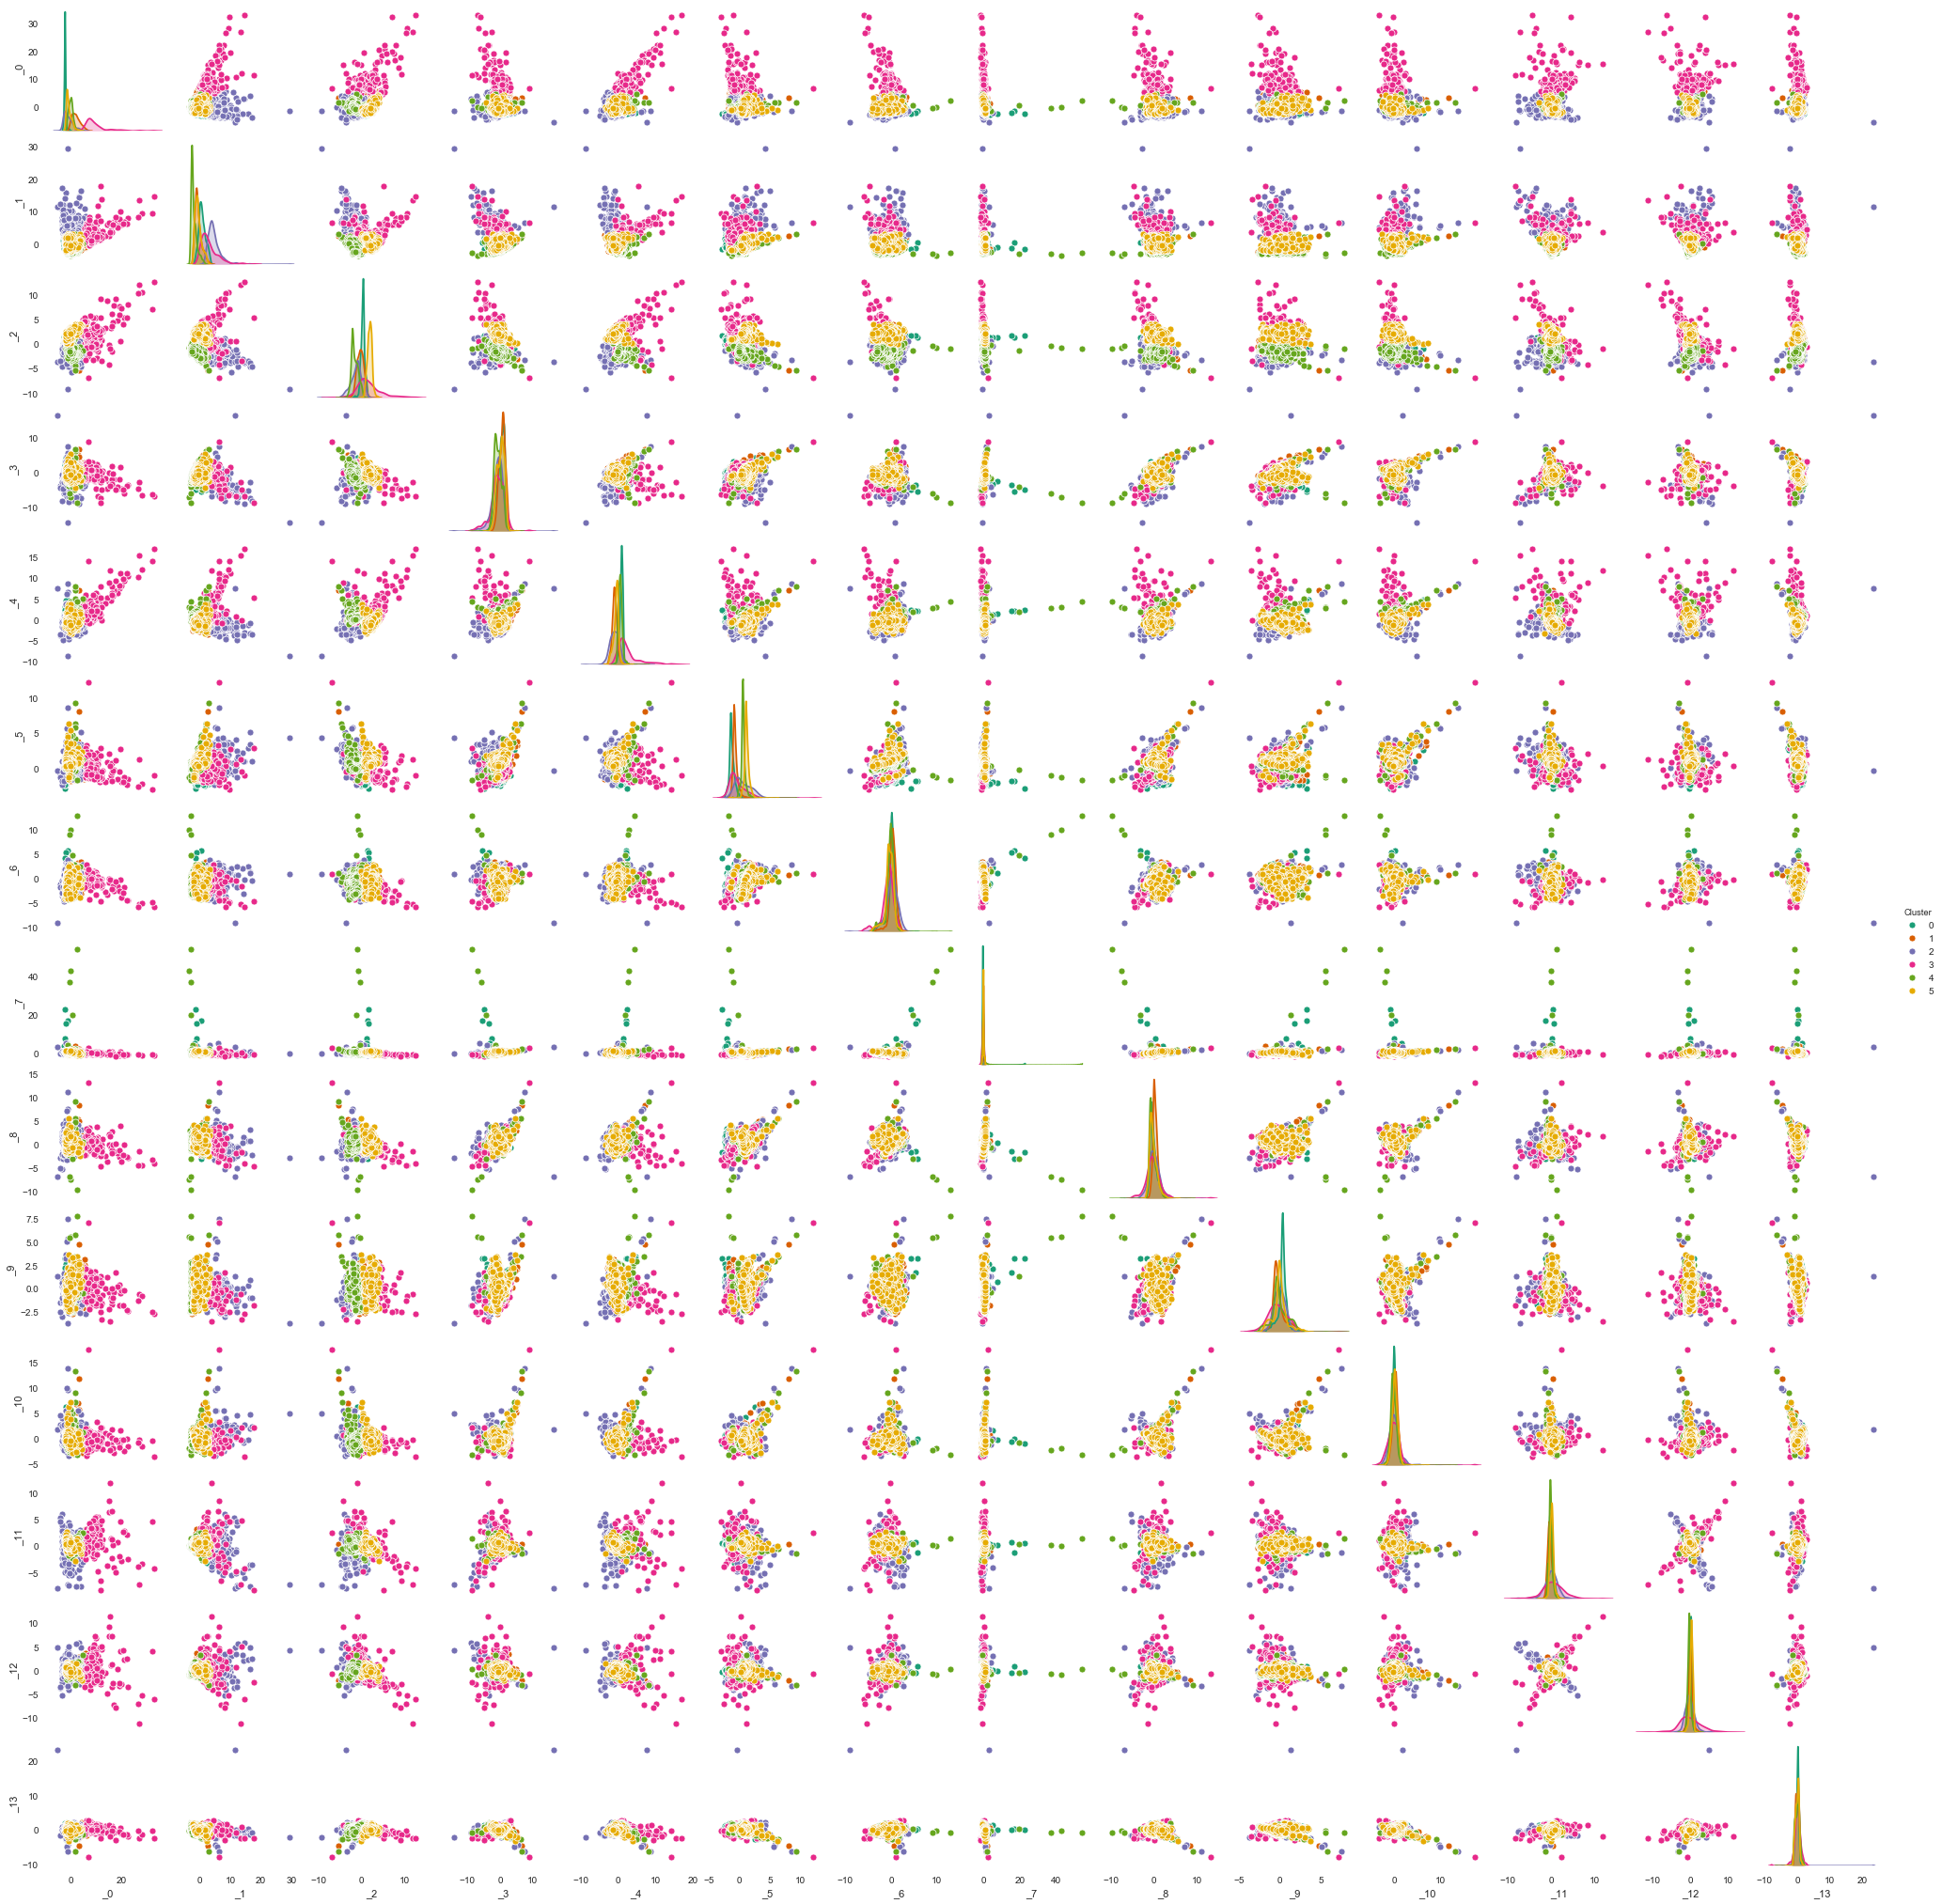

In [74]:
sns.pairplot(all_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=2)

In [46]:
#using silhouette to find the number of clusters we need.
from sklearn.metrics import calinski_harabaz_score,silhouette_score


In [75]:
score={}
score_c={}
for n in range(4,9):
    km_score=KMeans(n_clusters=n)
    km_score.fit(data_final)
    score_c[n]=calinski_harabaz_score(data_final,km_score.labels_)
    score[n]=silhouette_score(data_final,km_score.labels_)

C:\Users\tholk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tholk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tholk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tholk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function 

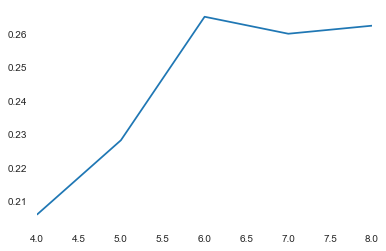

In [76]:
pd.Series(score).plot()

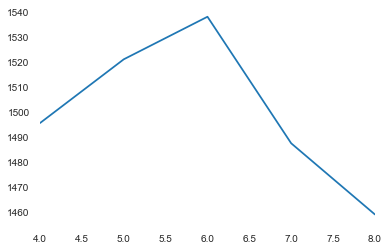

In [77]:
pd.Series(score_c).plot()

#both plot show that 6 is the good number for cluster. I am strick to this. Now, finding out the insights from clusters.

In [81]:
colums=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','LIMIT_USAGE','CASH_ADVANCE_TRX',
         'PAYMENT_MIN_PAY','oneoff_installment','installment','oneoff','none','CREDIT_LIMIT']

In [82]:
#visulisation of cluster with original data
final_data=pd.concat([data1[colums],pd.Series(KM_data.labels_,name='Cluster')],axis=1)

In [86]:
show=final_data.groupby('Cluster')\
.apply(lambda x: x[colums].mean()).T
show

Cluster,0,1,2,3,4,5
PURCHASES_TRX,0.079607,29.137328,9.464497,110.080460,11.525754,6.498829
Monthly_avg_purchase,0.381460,151.275219,57.778448,975.175151,43.962312,60.641896
Monthly_cash_advance,123.353009,30.155255,559.854084,72.084320,18.487854,39.118911
LIMIT_USAGE,0.564264,0.329629,0.644450,0.390403,0.250418,0.357329
CASH_ADVANCE_TRX,4.868048,1.448606,17.538462,2.373563,0.659861,1.742974
PAYMENT_MIN_PAY,9.812714,6.878138,6.629512,18.195688,13.695234,5.500004
oneoff_installment,0.011996,0.994590,0.286982,0.879310,0.002320,0.005855
installment,0.009815,0.002081,0.119822,0.034483,0.997680,0.000000
oneoff,0.000000,0.003329,0.226331,0.086207,0.000000,0.994145
none,0.978190,0.000000,0.366864,0.000000,0.000000,0.000000


# insights from each clusters

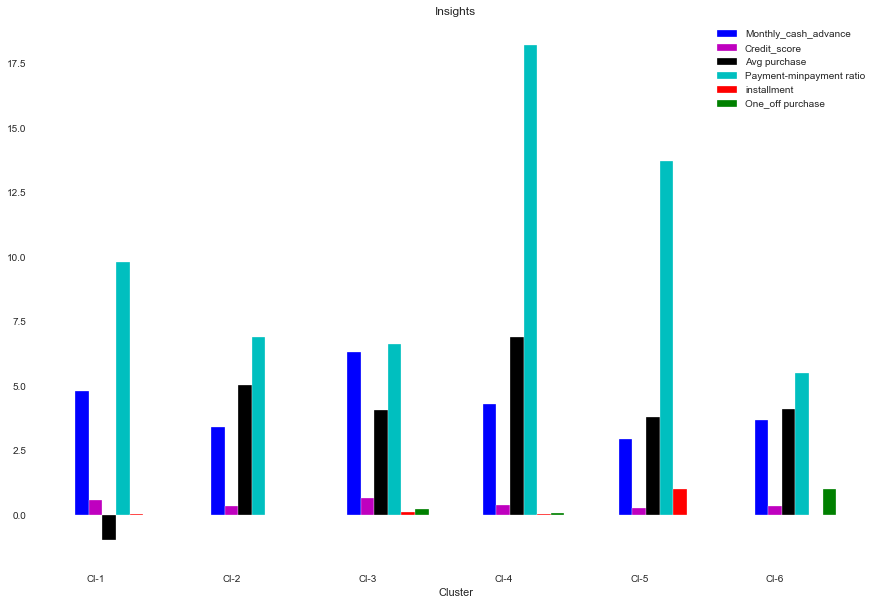

In [88]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(show.columns))

cash_advance=np.log(show.loc['Monthly_cash_advance',:].values)
credit_score=(show.loc['LIMIT_USAGE',:].values)
purchase= np.log(show.loc['Monthly_avg_purchase',:].values)
payment=show.loc['PAYMENT_MIN_PAY',:].values
installment=show.loc['installment',:].values
one_off=show.loc['oneoff',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly_cash_advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4','Cl-5', 'Cl-6'))
plt.legend()

In [97]:
size=final_data.groupby('Cluster').apply(lambda x: x['Cluster'].value_counts())

In [98]:
per=pd.Series((size.values.astype('float')/ final_data.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

   Size  Percentage
0  1834   20.491620
1  2403   26.849162
2   676    7.553073
3   174    1.944134
4  2155   24.078212
5  1708   19.083799


##cluster_1--showing good credit score with nill Avg purchase.This group is about 20.5% of the total customer base
##cluster_2--showing no installment and no One_off purchase.This group is about 27% of the total customer base
##cluster_3--showing best Credit_score above all groupes .This group is about 7.5% of the total customer base
##cluster_4--showing most Payment-minpayment ratio. This group is about 2% of the total customer base
##cluster_5--showing higher installment and lower Avg purchase This group is about 24% of the total customer base
##cluster_6--lowest Payment-minpayment ratio and higest one_off purchaseThis group is about 19% of the total customer base
